# 주제 : 서울시 구별 범죄 현황 분석


## ✔point✔

- CCTV와 범죄, 검거율에 관계가 있는가?
- 강남3구는 과연 범죄 발생률이 낮고 검거율이 높은가?
- 우리 동네는 어떤가?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\Windows\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

# 1. Data Definition

- http://data.go.kr
- https://www.data.go.kr/data/15054738/fileData.do

In [ ]:
crime_anal_police = pd.read_csv("data/seoul/crime_in_seoul.csv", encoding="euc-kr", thousands=",")
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


✔ thousands="," : ","로 인해 object형식인 데이터를 숫자 형식으로 자동 변환

In [ ]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.8+ KB


# 2. EDA & Preprocessing

## 1) 관서명을 구 이름으로 변경

- https://ko.wikipedia.org/wiki/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%EA%B2%BD%EC%B0%B0%EC%B2%AD

- API를 이용해서 각 경찰서의 주소 정보 획득
    - GoogleMap API
        - http://cloud.google.com
        - http://console.cloud.google.com
    - Kakao API 이용

### (1) GoogleMap API 이용

- 구글과 연결해주는 모듈
    - pip install googlemaps

In [ ]:
import googlemaps

In [ ]:
#### test ####

gmap_key = ""
gmaps = googlemaps.Client(key=gmap_key)

gmaps.geocode("종로경찰서", language="ko")

[{'address_components': [{'long_name': '41',
    'short_name': '41',
    'types': ['premise']},
   {'long_name': '인사동5길',
    'short_name': '인사동5길',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '종로구',
    'short_name': '종로구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '110-160',
    'short_name': '110-160',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 종로구 인사동5길 41',
  'geometry': {'location': {'lat': 37.571824, 'lng': 126.9841533},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.5731729802915,
     'lng': 126.9855022802915},
    'southwest': {'lat': 37.5704750197085, 'lng': 126.9828043197085}}},
  'partial_match': True,
  'place_id': 'ChIJRVgVHsOifDURFhKFchVo22I',


### (2) KAKAO API 이용

- http://developer.kakao.com
    - 내 애플리케이션 -> 애플리케이션 추가 -> RESR API키 복사
    - 플랫폼(WEB선택, http://localhost:8888 등록) -> Redirect URI(활성화, http://localhost:8888 등록
    - https://kauth.kakao.com/oauth/authorize?client_id=[RESTAPI키]&redirect_uri=http://localhost:8888&response_type=code

In [ ]:
#### test ####

import requests

url = "http://dapi.kakao.com/v2/local/search/keyword.json?query=서울중부경찰서"  # 서비스를 받기 위한 주소
head = {"Authorization" : ""}

# requests.get("http://naver.com").text  # 웹사이트에 접속할 수 있게 해주는 함수
requests.get(url, headers=head).json()
# requests.get(url, headers=head).json()["documents"][0]["address_name"]

{'documents': [{'address_name': '서울 중구 저동2가 62-1',
   'category_group_code': 'PO3',
   'category_group_name': '공공기관',
   'category_name': '사회,공공기관 > 행정기관 > 경찰서',
   'distance': '',
   'id': '11151738',
   'phone': '182',
   'place_name': '서울중부경찰서',
   'place_url': 'http://place.map.kakao.com/11151738',
   'road_address_name': '서울 중구 수표로 27',
   'x': '126.98958691395208',
   'y': '37.56361812722828'},
  {'address_name': '서울 중구 저동2가 62-1',
   'category_group_code': 'CT1',
   'category_group_name': '문화시설',
   'category_name': '문화,예술 > 문화시설 > 박물관',
   'distance': '',
   'id': '27184424',
   'phone': '',
   'place_name': '서울중부경찰서 역사박물관',
   'place_url': 'http://place.map.kakao.com/27184424',
   'road_address_name': '서울 중구 수표로 27',
   'x': '126.989582377239',
   'y': '37.5636848005606'},
  {'address_name': '서울 중구 저동2가 62-1',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '사회,공공기관 > 행정기관부속시설',
   'distance': '',
   'id': '10795753',
   'phone': '',
   'place_n

### (3) 경찰서 이름을 완전한 이름으로 변경

In [ ]:
station_names = []

for name in crime_anal_police["관서명"]:
    station_names.append("서울"+name[:-1]+"경찰서")

print(station_names)

['서울중부경찰서', '서울종로경찰서', '서울남대문경찰서', '서울서대문경찰서', '서울혜화경찰서', '서울용산경찰서', '서울성북경찰서', '서울동대문경찰서', '서울마포경찰서', '서울영등포경찰서', '서울성동경찰서', '서울동작경찰서', '서울광진경찰서', '서울서부경찰서', '서울강북경찰서', '서울금천경찰서', '서울중랑경찰서', '서울강남경찰서', '서울관악경찰서', '서울강서경찰서', '서울강동경찰서', '서울종암경찰서', '서울구로경찰서', '서울서초경찰서', '서울양천경찰서', '서울송파경찰서', '서울노원경찰서', '서울방배경찰서', '서울은평경찰서', '서울도봉경찰서', '서울수서경찰서']


### (4) 경찰서 주소와 위도, 경도값 받아오기(KAKAO API 이용)

In [ ]:
import requests

head = {"Authorization" : ""}

ka_station_addr = []
ka_station_lat = []
ka_station_lng = []

for name in station_names:
    url = "http://dapi.kakao.com/v2/local/search/keyword.json?query={}".format(name)
    place = requests.get(url, headers=head).json()["documents"][0]

    ka_station_addr.append(place["address_name"])
    ka_station_lat.append(place["y"])
    ka_station_lng.append(place["x"])

    print(name+"--->"+place["address_name"])

서울중부경찰서--->서울 중구 저동2가 62-1
서울종로경찰서--->서울 종로구 공평동 1
서울남대문경찰서--->서울 중구 남대문로5가 561
서울서대문경찰서--->서울 서대문구 미근동 165
서울혜화경찰서--->서울 종로구 인의동 48-57
서울용산경찰서--->서울 용산구 원효로1가 12-12
서울성북경찰서--->서울 성북구 삼선동5가 301
서울동대문경찰서--->서울 동대문구 청량리동 229
서울마포경찰서--->서울 마포구 아현동 618-1
서울영등포경찰서--->서울 영등포구 당산동3가 2-11
서울성동경찰서--->서울 성동구 행당동 192-8
서울동작경찰서--->서울 동작구 노량진동 72-35
서울광진경찰서--->서울 광진구 구의동 254-32
서울서부경찰서--->서울 은평구 녹번동 177-15
서울강북경찰서--->서울 강북구 번동 415-15
서울금천경찰서--->서울 금천구 시흥동 1030
서울중랑경찰서--->서울 중랑구 신내동 810
서울강남경찰서--->서울 강남구 대치동 998
서울관악경찰서--->서울 관악구 봉천동 1695-5
서울강서경찰서--->서울 강서구 화곡동 980-27
서울강동경찰서--->서울 강동구 성내동 541-1
서울종암경찰서--->서울 성북구 하월곡동 27-5
서울구로경찰서--->서울 구로구 구로동 3-25
서울서초경찰서--->서울 서초구 서초동 1726-1
서울양천경찰서--->서울 양천구 신정동 321
서울송파경찰서--->서울 송파구 가락동 9
서울노원경찰서--->서울 노원구 하계동 250
서울방배경찰서--->서울 서초구 방배동 455-10
서울은평경찰서--->서울 은평구 불광동 산 24
서울도봉경찰서--->서울 도봉구 창동 17
서울수서경찰서--->서울 강남구 개포동 14


### (5) 경찰서 주소와 위도, 경도값 받아오기(Google API 이용)

In [ ]:
import googlemaps

gmap_key = ""
gmaps = googlemaps.Client(key=gmap_key)

gg_station_addr = []
gg_station_lat = []
gg_station_lng = []

for name in station_names:

    place = gmaps.geocode(name, language="ko")[0]

    gg_station_addr.append(place["formatted_address"][5:])
    gg_station_lat.append(place["geometry"]["location"]["lat"])
    gg_station_lng.append(place["geometry"]["location"]["lng"])

    print(name+"--->"+place["formatted_address"][5:])

서울중부경찰서--->서울특별시 중구 수표로 27
서울종로경찰서--->서울특별시 종로구 인사동5길 41
서울남대문경찰서--->서울특별시 중구 한강대로 410
서울서대문경찰서--->서울특별시 서대문구 통일로 113
서울혜화경찰서--->서울특별시 종로구 창경궁로 112-16
서울용산경찰서--->서울특별시 용산구 백범로 329
서울성북경찰서--->서울특별시 성북구 삼선동 보문로 170
서울동대문경찰서--->서울특별시 동대문구 약령시로21길 29
서울마포경찰서--->서울특별시 마포구 마포대로 183
서울영등포경찰서--->서울특별시 영등포구 국회대로 608
서울성동경찰서--->서울특별시 성동구 행당동 왕십리광장로 9
서울동작경찰서--->서울특별시 동작구 노량진로 148
서울광진경찰서--->서울특별시 광진구 구의동 자양로 167
서울서부경찰서--->서울특별시 은평구 진흥로 58
서울강북경찰서--->서울특별시 강북구 오패산로 406
서울금천경찰서--->서울특별시 금천구 시흥대로73길 50
서울중랑경찰서--->서울특별시 중랑구 묵2동 249-2
서울강남경찰서--->서울특별시 강남구 테헤란로114길 11
서울관악경찰서--->서울특별시 관악구 관악로5길 33
서울강서경찰서--->서울특별시 양천구 신월동 화곡로 73
서울강동경찰서--->서울특별시 강동구 성내로 57
서울종암경찰서--->서울특별시 성북구 월곡2동 94-5
서울구로경찰서--->서울특별시 구로구 새말로 97 신도림테크노마트 5층
서울서초경찰서--->서울특별시 서초구 서초3동 반포대로 179
서울양천경찰서--->서울특별시 양천구 목동동로 99
서울송파경찰서--->서울특별시 송파구 중대로 221
서울노원경찰서--->서울특별시 노원구 노원로 283
서울방배경찰서--->서울특별시 서초구 동작대로 204
서울은평경찰서--->서울특별시 은평구 연서로 365
서울도봉경찰서--->서울특별시 도봉구 노해로 403
서울수서경찰서--->서울특별시 강남구 개포로 617


### (6) 구별, 위도, 경도 데이터를 원본 데이터에 병합

- 먼저 주소에서 구 이름만 추출
- 구별, 위도, 경도로 이루어진 데이터 프레임을 만든 후 원본 데이터 프레임과 합치기

In [ ]:
df = pd.DataFrame([ka_station_addr, ka_station_lat, ka_station_lng]).T
df.columns = ["구별", "위도", "경도"]
df["구별"] = df["구별"].str.split().str[1]  # Serise 형식을 풀어주기 위해 str사용 후 문자함수 사용
# df = df.set_index("구별")
# df = df.astype(float)
# df.groupby("구별").mean()
df

,구별,위도,경도
0,중구,37.56361812722828,126.98958691395208
1,종로구,37.57185082446809,126.98417036713045
2,중구,37.55477683026614,126.97349503706043
3,서대문구,37.5649023404956,126.966790740735
4,종로구,37.5718915247338,126.998935936567
5,용산구,37.54117933635974,126.96777437089538
6,성북구,37.58989767143614,127.01625465308534
7,동대문구,37.5850804205685,127.045762797538
8,마포구,37.5510118582052,126.95394117396
9,영등포구,37.52585220719,126.90094457988


In [ ]:
crime_anal_police["구별"] = df["구별"]
crime_anal_police["위도"] = df["위도"]
crime_anal_police["경도"] = df["경도"]

In [ ]:
crime_anal_police

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,위도,경도
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.56361812722828,126.98958691395208
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.57185082446809,126.98417036713045
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.55477683026614,126.97349503706043
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.5649023404956,126.966790740735
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.5718915247338,126.998935936567
5,용산서,5,5,14,14,194,173,1557,587,2050,1704,용산구,37.54117933635974,126.96777437089538
6,성북서,2,2,2,1,86,71,953,409,1194,1015,성북구,37.58989767143614,127.01625465308534
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227,동대문구,37.5850804205685,127.045762797538
8,마포서,8,8,14,10,294,247,2555,813,2983,2519,마포구,37.5510118582052,126.95394117396
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961,영등포구,37.52585220719,126.90094457988


### (7) Checkpoint

In [ ]:
crime_anal_police.to_csv("data/seoul/crime_anal_police_include_gu.csv", encoding="utf-8")

----

## 2) 관서명 삭제하고 구별을 인덱스로 지정

In [ ]:
crime_anal_raw = pd.read_csv("data/seoul/crime_anal_police_include_gu.csv", encoding="utf-8")

In [ ]:
# pd.pivot_table(crime_anal_raw, index="구별", aggfunc=np.sum) -> 자동으로 그룹화
del crime_anal_raw["관서명"]
del crime_anal_raw["Unnamed: 0"]

In [ ]:
crime_anal = crime_anal_raw.set_index("구별")
crime_anal = crime_anal.groupby("구별").sum()
# 하나의 구에 경찰서가 여러개 있을 수 있기 때문에 합쳐줘야 함
# 하지만 위도, 경도까지 같이 합쳐짐 -> 지우고 따로 합쳐줘야 할 듯

In [ ]:
crime_anal

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
구별,,,,,,,,,,
강남구,13,10,21,18,449,349,3850,1650,4284,3705
강동구,4,3,6,8,156,123,2366,789,2712,2248
강북구,7,8,14,13,153,126,1434,618,2649,2348
강서구,7,8,13,13,262,191,2096,1260,3207,2718
관악구,9,8,12,14,320,221,2706,827,3298,2642
광진구,4,4,14,26,240,220,3026,1277,2625,2180
구로구,8,6,15,11,281,164,2335,889,3007,2432
금천구,3,4,6,6,151,122,1567,888,2054,1776
노원구,10,10,7,7,197,121,2193,801,2723,2329


## 3) 각 범죄의 검거율을 계산하여 파생변수로 추가하고 검거 컬럼 삭제

In [ ]:
crime_anal["강도검거율"] = crime_anal["강도 검거"] / crime_anal["강도 발생"] * 100
crime_anal["강간검거율"] = crime_anal["강간 검거"] / crime_anal["강간 발생"] * 100
crime_anal["살인검거율"] = crime_anal["살인 검거"] / crime_anal["살인 발생"] * 100
crime_anal["절도검거율"] = crime_anal["절도 검거"] / crime_anal["절도 발생"] * 100
crime_anal["폭력검거율"] = crime_anal["폭력 검거"] / crime_anal["폭력 발생"] * 100

In [ ]:
del crime_anal["강도 검거"]
del crime_anal["강간 검거"]
del crime_anal["살인 검거"]
del crime_anal["절도 검거"]
del crime_anal["폭력 검거"]

In [ ]:
crime_anal

,살인 발생,강도 발생,강간 발생,절도 발생,폭력 발생,강도검거율,강간검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,13,21,449,3850,4284,85.714286,77.728285,76.923077,42.857143,86.484594
강동구,4,6,156,2366,2712,133.333333,78.846154,75.000000,33.347422,82.890855
강북구,7,14,153,1434,2649,92.857143,82.352941,114.285714,43.096234,88.637222
강서구,7,13,262,2096,3207,100.000000,72.900763,114.285714,60.114504,84.752105
관악구,9,12,320,2706,3298,116.666667,69.062500,88.888889,30.561715,80.109157
광진구,4,14,240,3026,2625,185.714286,91.666667,100.000000,42.200925,83.047619
구로구,8,15,281,2335,3007,73.333333,58.362989,75.000000,38.072805,80.877951
금천구,3,6,151,1567,2054,100.000000,80.794702,133.333333,56.668794,86.465433
노원구,10,7,197,2193,2723,100.000000,61.421320,100.000000,36.525308,85.530665


In [ ]:
#### 검거율에서 100이 넘는 값 모두 100으로 맞추기 ####

for col in ["강도검거율", "강간검거율", "살인검거율", "절도검거율", "폭력검거율"]:
    crime_anal.loc[crime_anal[col] > 100, col] = 100

crime_anal

,살인 발생,강도 발생,강간 발생,절도 발생,폭력 발생,강도검거율,강간검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,13,21,449,3850,4284,85.714286,77.728285,76.923077,42.857143,86.484594
강동구,4,6,156,2366,2712,100.000000,78.846154,75.000000,33.347422,82.890855
강북구,7,14,153,1434,2649,92.857143,82.352941,100.000000,43.096234,88.637222
강서구,7,13,262,2096,3207,100.000000,72.900763,100.000000,60.114504,84.752105
관악구,9,12,320,2706,3298,100.000000,69.062500,88.888889,30.561715,80.109157
광진구,4,14,240,3026,2625,100.000000,91.666667,100.000000,42.200925,83.047619
구로구,8,15,281,2335,3007,73.333333,58.362989,75.000000,38.072805,80.877951
금천구,3,6,151,1567,2054,100.000000,80.794702,100.000000,56.668794,86.465433
노원구,10,7,197,2193,2723,100.000000,61.421320,100.000000,36.525308,85.530665


In [ ]:
#### 컬럼에서 "발생"이라는 단어 삭제 ####

crime_anal.rename(columns={"강도 발생":"강도", "강간 발생":"강간", "살인 발생":"살인",
                           "절도 발생":"절도", "폭력 발생":"폭력"}, inplace=True)
crime_anal.sort_values(by="구별").head()

,살인,강도,강간,절도,폭력,강도검거율,강간검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,13,21,449,3850,4284,85.714286,77.728285,76.923077,42.857143,86.484594
강동구,4,6,156,2366,2712,100.000000,78.846154,75.000000,33.347422,82.890855
강북구,7,14,153,1434,2649,92.857143,82.352941,100.000000,43.096234,88.637222
강서구,7,13,262,2096,3207,100.000000,72.900763,100.000000,60.114504,84.752105
관악구,9,12,320,2706,3298,100.000000,69.062500,88.888889,30.561715,80.109157


In [ ]:
#### 위도, 경도

df = df.set_index("구별")
df = df.astype(float)
df = df.groupby("구별").mean()

In [ ]:
crime_anal = pd.merge(crime_anal, df, on="구별")
crime_anal

In [ ]:
#### Checkpoint ####
crime_anal.to_csv("data/seoul/crime_anal.csv", encoding="utf-8")

----

## 4) 수치 데이터에 대한 Scaling : 정규화 / 표준화

- 정규화(Normalization)
    - 데이터의 상대적인 크기에 따른 영향을 줄이기 위해서 데이터 범위를 0~1로 변환
    - 공식 = (측정값 - 최솟값) / (최대값 - 최솟값)

- 표준화(Standardization)
    - 데이터가 평균으로부터 얼마나 멀리 떨어져 있는지 나타내는 값으로 특정 범위를 벗어난 데이터는 이상치로 간주
    - 공식 = (측정값 - 평균) / 표준편차

In [ ]:
crime_anal = pd.read_csv("data/seoul/crime_anal.csv", encoding="utf-8")
crime_anal = crime_anal.set_index("구별")

In [ ]:
from sklearn import preprocessing # 머신러닝 때 사용하는 모듈

In [ ]:
#### 정규화 ####
Mm_scaler = preprocessing.MinMaxScaler() # 표준화 = StandardScaler()

cols = ["살인", "강도", "강간", "절도", "폭력"]
x = crime_anal[cols].values

x_scaled = Mm_scaler.fit_transform(x)  # 0~1사이의 값으로 반환

crime_anal_norm = pd.DataFrame(x_scaled, columns=cols, index=crime_anal.index)  # 새로운 프레임으로 생성
crime_anal_norm.head()

cols2 = ["살인검거율", "강도검거율", "강간검거율", "절도검거율", "폭력검거율"]
crime_anal_norm[cols2] = crime_anal[cols2]
crime_anal_norm.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,0.916667,0.941176,1.000000,1.000000,1.000000,76.923077,85.714286,77.728285,42.857143,86.484594
강동구,0.166667,0.058824,0.155620,0.467528,0.437969,75.000000,100.000000,78.846154,33.347422,82.890855
강북구,0.416667,0.529412,0.146974,0.133118,0.415445,100.000000,92.857143,82.352941,43.096234,88.637222
강서구,0.416667,0.470588,0.461095,0.370649,0.614945,100.000000,100.000000,72.900763,60.114504,84.752105
관악구,0.583333,0.411765,0.628242,0.589523,0.647479,88.888889,100.000000,69.062500,30.561715,80.109157


In [ ]:
#### Checkpoint ####
crime_anal_norm.to_csv("data/seoul/crime_anal_norm.csv", encoding="utf-8")

## 5) 범죄데이터와 CCTV데이터 병합

In [ ]:
cctv_result = pd.read_csv("data/seoul/cctv_result.csv", index_col="구별")
cctv_result.head()

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근 증가율,오차,CCTV비율
구별,,,,,,,,,,
강남구,557865,552976,4889,65859,0.876377,11.805544,3238,150.619195,1553.296412,0.580427
양천구,473087,469221,3866,56070,0.817186,11.851943,2482,34.671731,890.918761,0.524639
강서구,608361,601696,6665,77381,1.095567,12.719586,911,134.793814,829.467513,0.149747
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374,756.346747,0.854077
서초구,445164,440954,4210,54055,0.945719,12.142716,2297,63.371266,736.754790,0.515990


In [ ]:
crime_anal_norm[["인구수", "CCTV"]] = cctv_result[["인구수", "CCTV비율"]]
crime_anal_norm.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,0.916667,0.941176,1.000000,1.000000,1.000000,76.923077,85.714286,77.728285,42.857143,86.484594,557865,0.580427
강동구,0.166667,0.058824,0.155620,0.467528,0.437969,75.000000,100.000000,78.846154,33.347422,82.890855,438225,0.230475
강북구,0.416667,0.529412,0.146974,0.133118,0.415445,100.000000,92.857143,82.352941,43.096234,88.637222,327511,0.253732
강서구,0.416667,0.470588,0.461095,0.370649,0.614945,100.000000,100.000000,72.900763,60.114504,84.752105,608361,0.149747
관악구,0.583333,0.411765,0.628242,0.589523,0.647479,88.888889,100.000000,69.062500,30.561715,80.109157,522292,0.403797


## 6) 범죄 발생 건수와 검거율을 각각 범죄와 검거율 컬럼으로 통합

In [ ]:
cols = ["살인", "강도", "강간", "절도", "폭력"]
crime_anal_norm["범죄"] = np.sum(crime_anal_norm[cols], axis=1)
crime_anal_norm.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,0.916667,0.941176,1.000000,1.000000,1.000000,76.923077,85.714286,77.728285,42.857143,86.484594,557865,0.580427,4.857843
강동구,0.166667,0.058824,0.155620,0.467528,0.437969,75.000000,100.000000,78.846154,33.347422,82.890855,438225,0.230475,1.286607
강북구,0.416667,0.529412,0.146974,0.133118,0.415445,100.000000,92.857143,82.352941,43.096234,88.637222,327511,0.253732,1.641616
강서구,0.416667,0.470588,0.461095,0.370649,0.614945,100.000000,100.000000,72.900763,60.114504,84.752105,608361,0.149747,2.333944
관악구,0.583333,0.411765,0.628242,0.589523,0.647479,88.888889,100.000000,69.062500,30.561715,80.109157,522292,0.403797,2.860342


In [ ]:
cols2 = ["살인검거율", "강도검거율", "강간검거율", "절도검거율", "폭력검거율"]
crime_anal_norm["검거율"] = np.sum(crime_anal_norm[cols2], axis=1)
crime_anal_norm.head()

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거율
구별,,,,,,,,,,,,,,
강남구,0.916667,0.941176,1.000000,1.000000,1.000000,76.923077,85.714286,77.728285,42.857143,86.484594,557865,0.580427,4.857843,369.707384
강동구,0.166667,0.058824,0.155620,0.467528,0.437969,75.000000,100.000000,78.846154,33.347422,82.890855,438225,0.230475,1.286607,370.084431
강북구,0.416667,0.529412,0.146974,0.133118,0.415445,100.000000,92.857143,82.352941,43.096234,88.637222,327511,0.253732,1.641616,406.943540
강서구,0.416667,0.470588,0.461095,0.370649,0.614945,100.000000,100.000000,72.900763,60.114504,84.752105,608361,0.149747,2.333944,417.767372
관악구,0.583333,0.411765,0.628242,0.589523,0.647479,88.888889,100.000000,69.062500,30.561715,80.109157,522292,0.403797,2.860342,368.622261


# 3. Final Analysis & Visualization

## 1) 강도, 살인, 폭력 간의 상관관계

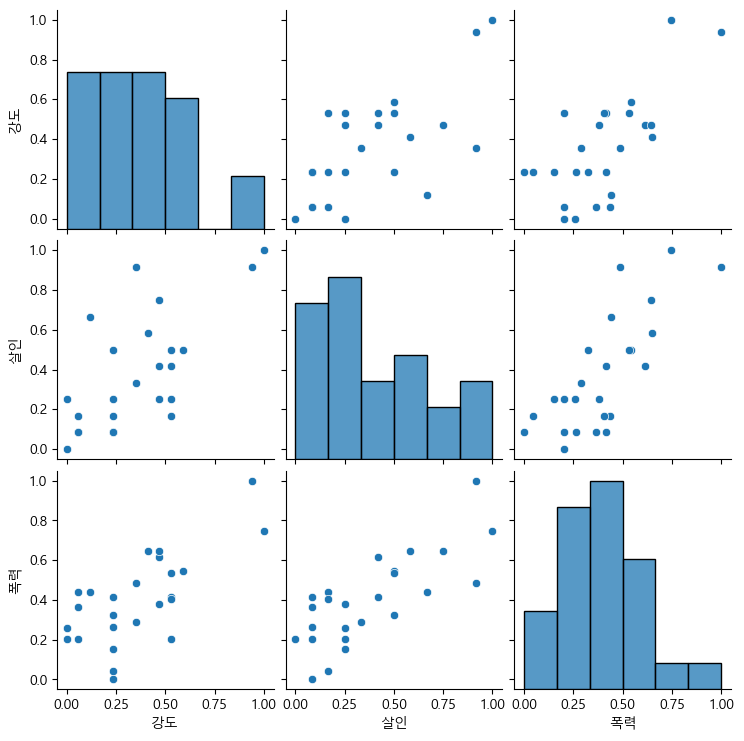

In [ ]:
sns.pairplot(crime_anal_norm, vars=["강도", "살인", "폭력"])

## 2) 인구수, CCTV 개수, 강도, 살인에 대한 상관관계

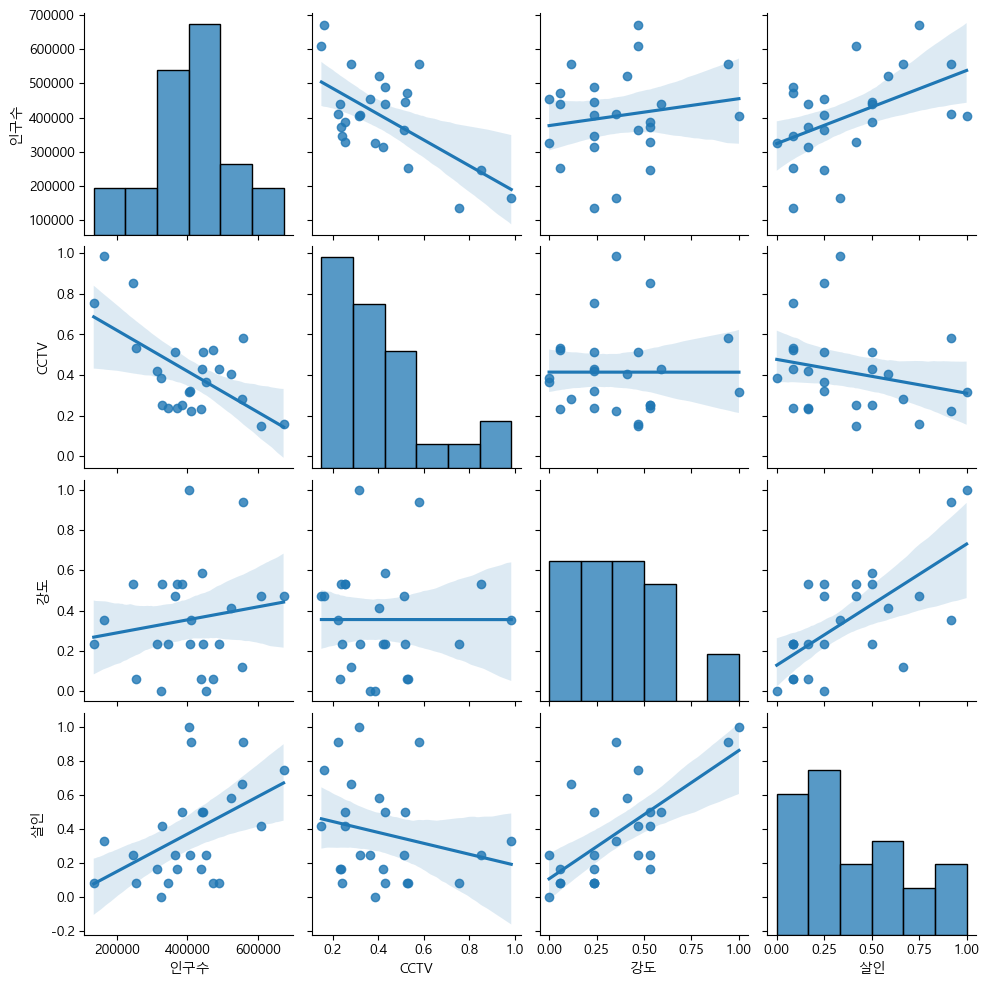

In [ ]:
%matplotlib inline
sns.pairplot(crime_anal_norm, vars=["인구수", "CCTV", "강도", "살인"], kind="reg")

CCTV와 범죄 발생간의 관계는 크지 않음

## 3) 살인과 폭력 검거율과 인구수 및 CCTV의 상관관계

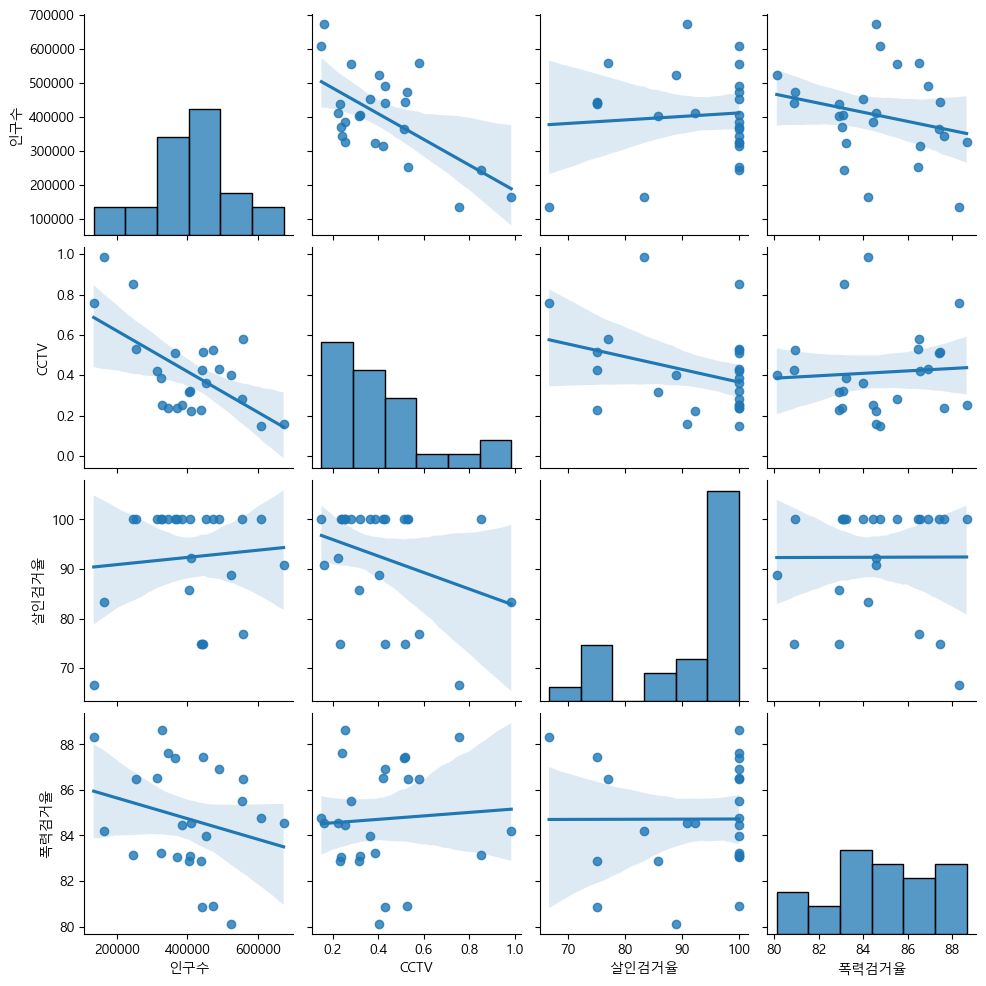

In [ ]:
%matplotlib inline
sns.pairplot(crime_anal_norm, vars=["인구수", "CCTV", "살인검거율", "폭력검거율"], kind="reg")

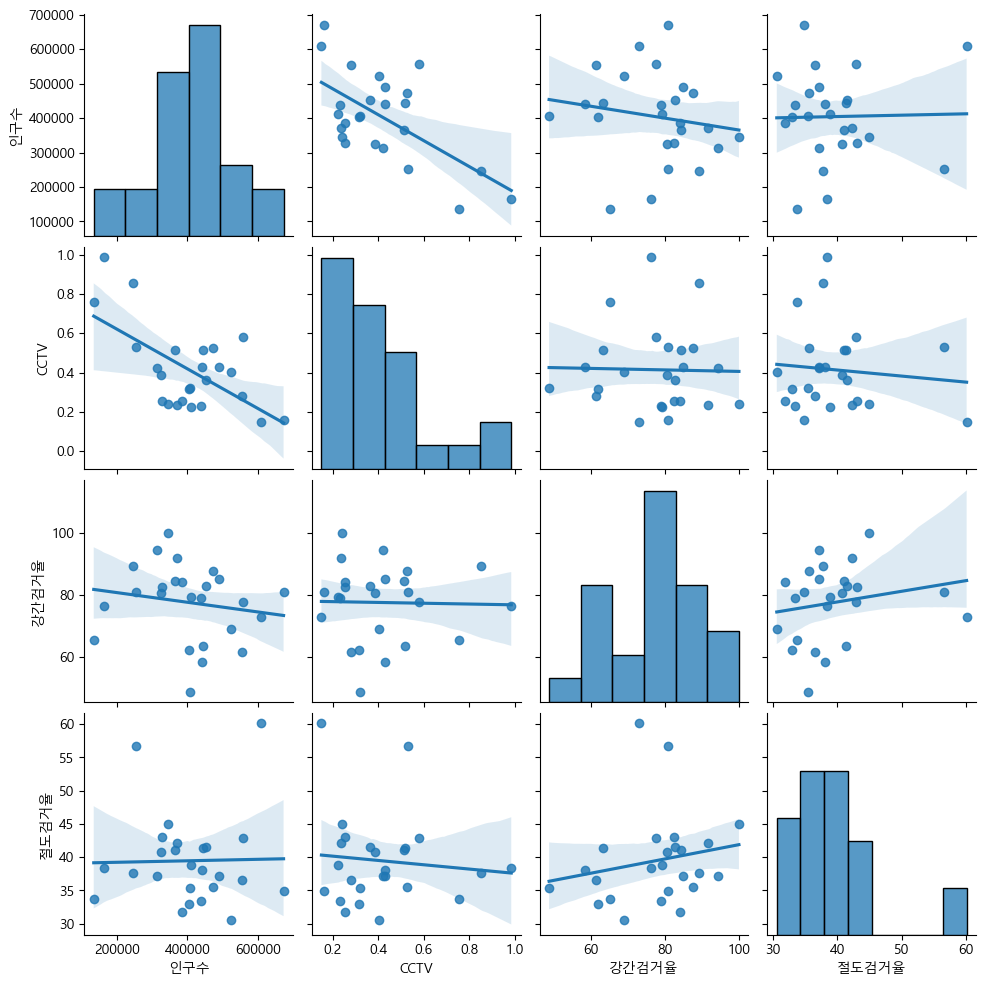

In [ ]:
%matplotlib inline
sns.pairplot(crime_anal_norm, vars=["인구수", "CCTV", "강간검거율", "절도검거율"], kind="reg")

CCTV와 범죄 검거율간의 관계가 없어보임. 오히려 음의 상관관계가.. 왜그럴까?

## 4) 지역별 검거율

In [ ]:
#### 정규화 ####

crime_anal_norm["검거율"] = crime_anal_norm["검거율"]/crime_anal_norm["검거율"].max() * 100

In [ ]:
#### 정렬 ####

crime_anal_norm_sort = crime_anal_norm.sort_values(by="검거율")
crime_anal_norm_sort

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거율
구별,,,,,,,,,,,,,,
중구,0.083333,0.235294,0.195965,0.532831,0.263497,66.666667,66.666667,65.294118,33.712716,88.309353,135139,0.756998,0.262184,74.122650
동작구,0.250000,0.235294,0.527378,0.287765,0.151233,100.000000,55.555556,48.771930,35.442359,83.089005,406715,0.320126,0.290334,74.633368
구로구,0.500000,0.588235,0.515850,0.456405,0.543439,75.000000,73.333333,58.362989,38.072805,80.877951,440396,0.427797,0.520786,75.277906
서초구,0.500000,0.235294,0.838617,0.564047,0.326064,75.000000,66.666667,63.358779,41.404175,87.453105,445164,0.515990,0.492804,77.181692
양천구,0.083333,0.058824,0.051873,0.296735,0.365391,100.000000,50.000000,87.500000,35.555556,80.908729,473087,0.524639,0.171231,81.823827
영등포구,1.000000,1.000000,0.556196,0.682095,0.745442,85.714286,90.909091,62.033898,32.995951,82.894737,403988,0.316098,0.796747,81.958753
종로구,0.333333,0.352941,0.314121,0.402225,0.288166,83.333333,81.818182,76.303318,38.324176,84.212822,164348,0.985105,0.338157,84.141835
송파구,0.750000,0.470588,0.340058,0.780768,0.646407,90.909091,76.923077,80.909091,34.856437,84.552352,671994,0.160865,0.597564,85.103066
관악구,0.583333,0.411765,0.628242,0.589523,0.647479,88.888889,100.000000,69.062500,30.561715,80.109157,522292,0.403797,0.572068,85.212224


Text(0.5, 1.0, '범죄 검거비율(정규화된 검거의 합으로 정렬)')

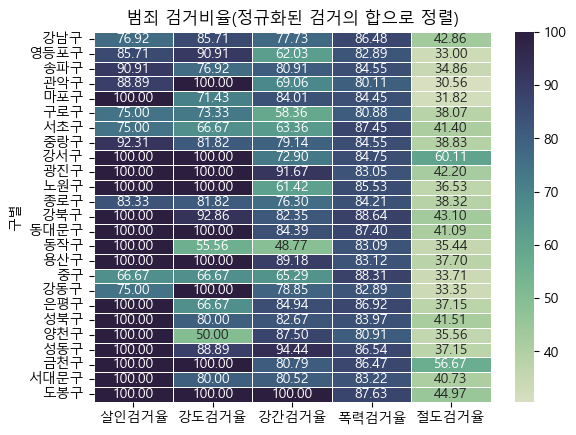

In [ ]:
#### 히트맵 사용 ####

sns.heatmap(crime_anal_norm_sort[["살인검거율", "강도검거율", "강간검거율", "폭력검거율", "절도검거율"]],
            cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True), annot=True, fmt=".2f", linewidths=0.7)

plt.title("범죄 검거비율(정규화된 검거의 합으로 정렬)")

## 5) 지역별 발생 건수

In [ ]:
crime_anal_norm["범죄"] = crime_anal_norm["범죄"] / 5

In [ ]:
crime_anal_norm_sort = crime_anal_norm.sort_values(by="범죄", ascending=False)
crime_anal_norm_sort

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거율
구별,,,,,,,,,,,,,,
강남구,0.916667,0.941176,1.000000,1.000000,1.000000,76.923077,85.714286,77.728285,42.857143,86.484594,557865,0.580427,0.971569,85.463066
영등포구,1.000000,1.000000,0.556196,0.682095,0.745442,85.714286,90.909091,62.033898,32.995951,82.894737,403988,0.316098,0.796747,81.958753
송파구,0.750000,0.470588,0.340058,0.780768,0.646407,90.909091,76.923077,80.909091,34.856437,84.552352,671994,0.160865,0.597564,85.103066
관악구,0.583333,0.411765,0.628242,0.589523,0.647479,88.888889,100.000000,69.062500,30.561715,80.109157,522292,0.403797,0.572068,85.212224
마포구,0.500000,0.529412,0.553314,0.535343,0.534859,100.000000,71.428571,84.013605,31.819961,84.445189,385624,0.254134,0.530585,85.925381
구로구,0.500000,0.588235,0.515850,0.456405,0.543439,75.000000,73.333333,58.362989,38.072805,80.877951,440396,0.427797,0.520786,75.277906
서초구,0.500000,0.235294,0.838617,0.564047,0.326064,75.000000,66.666667,63.358779,41.404175,87.453105,445164,0.515990,0.492804,77.181692
중랑구,0.916667,0.352941,0.244957,0.384643,0.486235,92.307692,81.818182,79.144385,38.829040,84.545135,411552,0.222572,0.477089,87.066663
강서구,0.416667,0.470588,0.461095,0.370649,0.614945,100.000000,100.000000,72.900763,60.114504,84.752105,608361,0.149747,0.466789,96.572809


Text(0.5, 1.0, '범죄 발생률(정규화된 범죄의 합으로 정렬)')

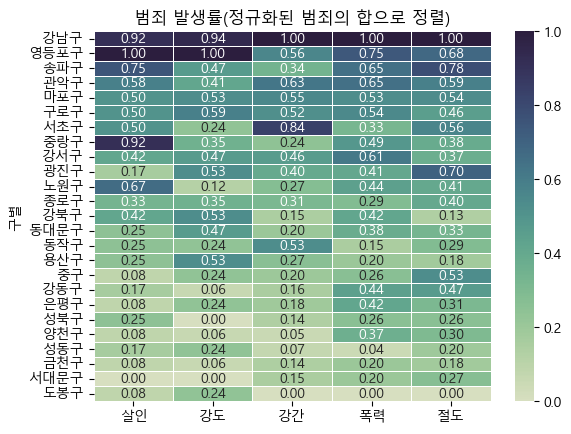

In [ ]:
sns.heatmap(crime_anal_norm_sort[["살인", "강도", "강간", "폭력", "절도"]],
            cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True), annot=True, fmt=".2f", linewidths=0.7)

plt.title("범죄 발생률(정규화된 범죄의 합으로 정렬)")

## 6) 지도 시각화

In [ ]:
import folium

map = folium.Map(location=[37.5125585, 127], zoom_start=11)
map

### (1) 살인사건이 발생한 지역

In [ ]:
geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"

map = folium.Map(location=[37.5125585, 127], zoom_start=11)
map.choropleth(geo_data=geo_path, data=crime_anal_norm_sort, key_on="feature.id",
              columns=[crime_anal_norm_sort.index, "살인"], fill_color="YlOrBr")
map

### (2) 범죄 사건이 발생한 지역

In [ ]:
geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"

map = folium.Map(location=[37.5125585, 127], zoom_start=11)
map.choropleth(geo_data=geo_path, data=crime_anal_norm, key_on="feature.id",
              columns=[crime_anal_norm.index, "범죄"], fill_color="RdPu")
map

### (3) 인구대비 범죄 발생 비율

In [ ]:
crime_pop = crime_anal_norm_sort["범죄"] / crime_anal_norm_sort["인구수"] * 100000
crime_pop.sort_values()

구별
도봉구     0.018469
양천구     0.036194
서대문구    0.038294
성북구     0.039899
성동구     0.045208
은평구     0.049986
금천구     0.052650
강동구     0.058719
노원구     0.068565
동작구     0.071385
강서구     0.076729
송파구     0.088924
동대문구    0.089539
강북구     0.100248
관악구     0.109530
서초구     0.110702
중랑구     0.115924
용산구     0.115975
구로구     0.118254
광진구     0.118652
마포구     0.137591
강남구     0.174158
중구      0.194011
영등포구    0.197220
종로구     0.205757
dtype: float64

In [ ]:
geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"

map = folium.Map(location=[37.5125585, 127], zoom_start=11)
map.choropleth(geo_data=geo_path, data=crime_pop, key_on="feature.id",
              columns=[crime_pop.index, crime_pop], fill_color="RdPu")
map

C:\Users\acorn\anaconda3\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


구별 검거율

In [ ]:
geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"

map = folium.Map(location=[37.5125585, 127], zoom_start=11)
map.choropleth(geo_data=geo_path, data=crime_anal_norm, key_on="feature.id",
              columns=[crime_anal_norm.index, "검거율"], fill_color="RdPu")
map

C:\Users\acorn\anaconda3\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


### (4) 경찰서별 검거율과 구별 범죄 발생율 동시 시각화

In [ ]:
crime_anal_police = pd.read_csv("data/seoul/crime_anal_police_include_gu.csv", encoding="utf-8", index_col="관서명")
del crime_anal_police["Unnamed: 0"]
crime_anal_police.head()

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,위도,경도
관서명,,,,,,,,,,,,,
중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563618,126.989587
종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.571851,126.984170
남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.554777,126.973495
서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.564902,126.966791
혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571892,126.998936


In [ ]:
cols = ["살인 검거", "강도 검거", "강간 검거", "절도 검거", "폭력 검거"]
norm = crime_anal_police[cols] / crime_anal_police.max()

crime_anal_police["검거"] = np.sum(norm, axis=1)
crime_anal_police.head()

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,위도,경도,검거
관서명,,,,,,,,,,,,,,
중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563618,126.989587,1.275416
종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.571851,126.984170,1.523847
남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.554777,126.973495,0.907372
서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.564902,126.966791,1.978299
혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571892,126.998936,1.198382


In [ ]:
#### 경찰서 위치를 지도에 마킹 ####

map = folium.Map(location=[37.5125585, 127], zoom_start=11)

for i in crime_anal_police.index:
    folium.Marker(location=[crime_anal_police["위도"][i], crime_anal_police["경도"][i]],
                  icon=folium.Icon(color="red", icon="star"), popup=i).add_to(map)
    folium.CircleMarker(location=[crime_anal_police["위도"][i], crime_anal_police["경도"][i]],
                        popup=crime_anal_police["검거"][i].round(2),
                        radius=crime_anal_police["검거"][i]*10, color="#3186cc", fill_color="#3186cc").add_to(map)
map

In [ ]:
#### 경찰서 구역별로 범죄 발생율과 검거율을 동시에 시각화 ####

geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"

map = folium.Map(location=[37.5125585, 127], zoom_start=11)
map.choropleth(geo_data=geo_path, data=crime_anal_norm, key_on="feature.id",
              columns=[crime_anal_norm.index, "범죄"], fill_color="RdPu")

for i in crime_anal_police.index:
    folium.CircleMarker(location=[crime_anal_police["위도"][i], crime_anal_police["경도"][i]],
                        popup=crime_anal_police["검거"][i].round(2),
                        radius=crime_anal_police["검거"][i]*10, color="#3186cc", fill_color="#3186cc").add_to(map)
map